In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

La documentación sobre RandomForestRegressor puede encontrarse en https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Importamos los datos de alquileres de Boston de sklearn.dataset

In [3]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
#elegimos para X e Y los siguientes datos de la tabla
X_features = dsBoston.data
y_prices = dsBoston.target
#separamos los datos de test y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_features, y_prices, test_size=0.2, random_state=42)

Creamos nuestro modelo de Random Forest Regressor

In [5]:
rfrmBoston = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfrmBoston.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Comparamos los valores que predice el modelo con los de testeo

In [6]:
y_expected = y_test
y_predicted = rfrmBoston.predict(X_test)
#Calculamos el R^2
print('R^2 es {}'.format(metrics.r2_score(y_expected, y_predicted)))


R^2 es 0.873390709910713


In [7]:
y_predicted = rfrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'Predicción': y_predicted})
dfAP.head(10)

,Actual,Predicción
0,24.0,27.970
1,21.6,21.811
2,34.7,35.150
3,33.4,34.612
4,36.2,35.173
5,28.7,26.533
6,22.9,21.831
7,27.1,23.439
8,16.5,17.101
9,18.9,19.656


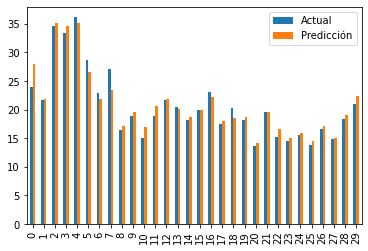

In [8]:
dfAP.head(30).plot(kind='bar')
plt.show()